# Mesh Quality Automatic

# Aspect Ratio
The Aspect ratio is defined as the absolute of the shortest edge devided by the longest edge.

Manually is is been done like the cell below.

C:\Users\20192167\Anaconda3\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


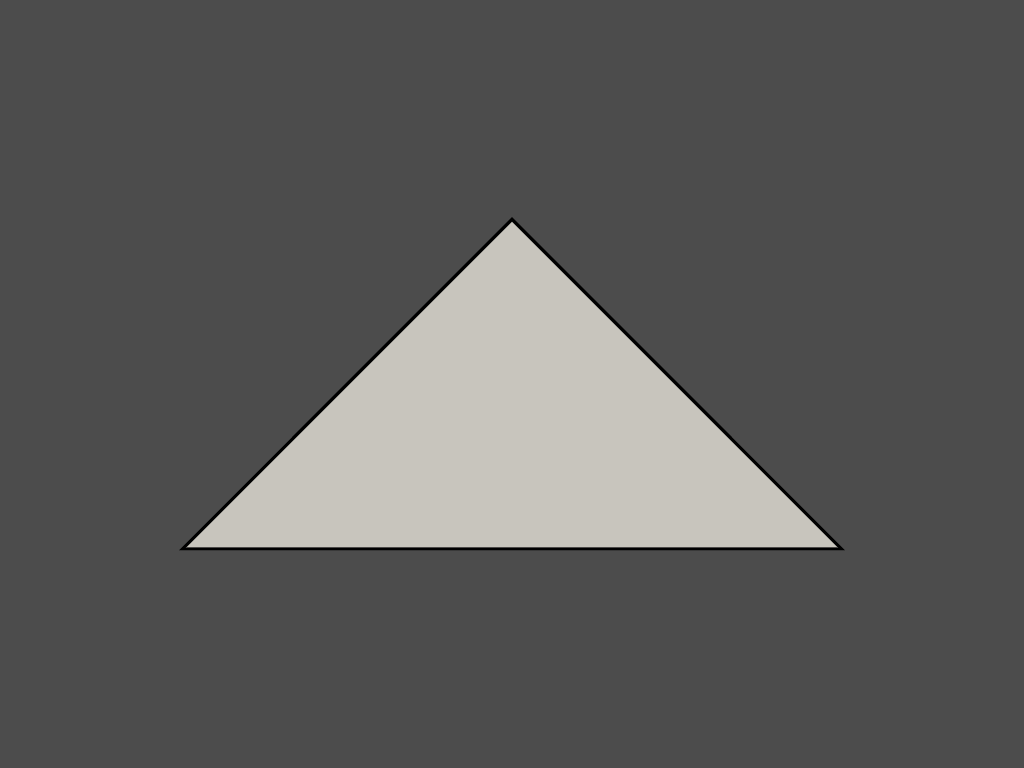

(0.7071067811865476, 2.0, 1.4142135623730951, 1.4142135623730951)

In [1]:
import numpy as np
import pyvista
points = np.array([[0,0,0],
                   [2,0,0],
                   [1,1,0]])
cells = [3, 0, 1, 2]
mesh = pyvista.PolyData(points, [3, 0, 1, 2])
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(3)],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

import math

length = abs(points[0]-points[1])
lengthx = length[0]
lengthy = length[1]
distance1= math.sqrt(lengthx**2 + lengthy**2)

length = abs(points[1]-points[2])
lengthx = length[0]
lengthy = length[1]
distance2= math.sqrt(lengthx**2 + lengthy**2)

length = abs(points[2]-points[0])
lengthx = length[0]
lengthy = length[1]
distance3= math.sqrt(lengthx**2 + lengthy**2)

aspect_ratio_initial=distance2/distance1
aspect_ratio_initial, distance1, distance2, distance3

We can make it automatic by running the following code:
It is a for loop that determines the length of each edge of the triangle and then stores it in the distance list.

In [2]:
distance = [] #This creates or emptys the distance list

for x in range (0,3):
    l = abs(points[x%3]-points[(x+1)%3]) # calculates the difference in x and y coordinates of the points
    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
    distance.append(d) 

aspect_ratio = min(distance)/max(distance)
aspect_ratio, distance

(0.7071067811865476, [2.0, 1.4142135623730951, 1.4142135623730951])

Now a single cell has been successful we will try a refined mesh. Again first the manual way is showed.

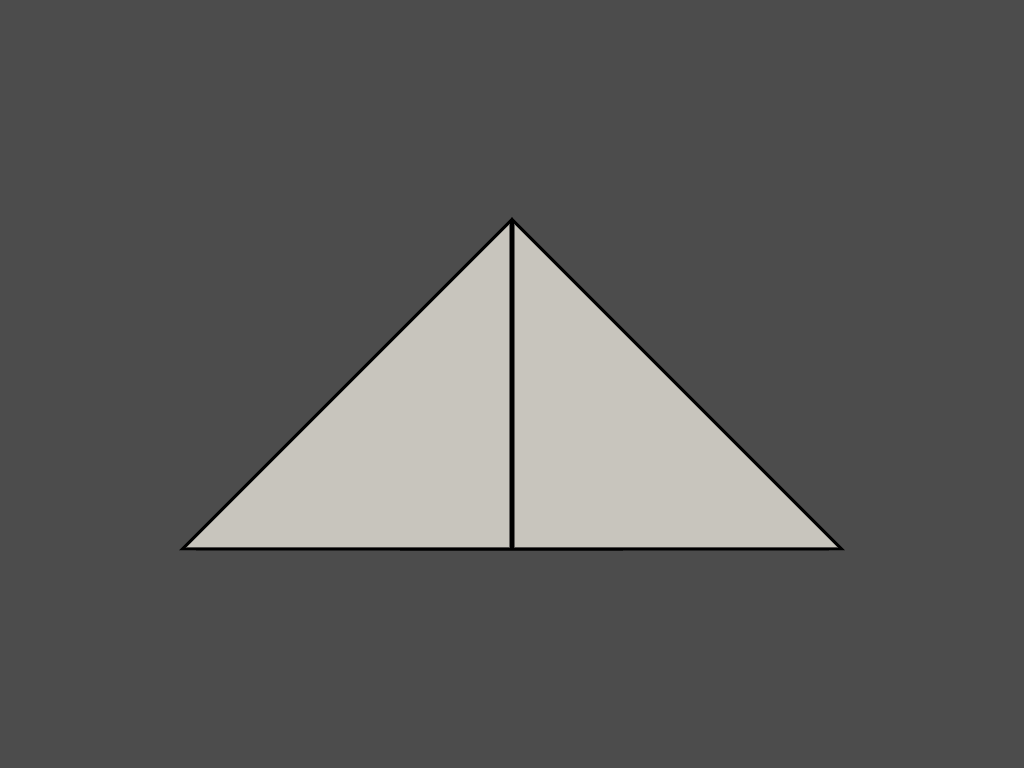

The average Aspect Ratio of the cell is  0.71


In [3]:
points = np.array([[0,0,0],
                   [2,0,0],
                   [1,1,0],
                   [1,0,0]])
# [number of points, first point, second point, third point]
cells = [[3, 0,3,2], 
          [3, 3,1,2]]
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(4)],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

length = abs(points[0]-points[3])
lengthx = length[0]
lengthy = length[1]
distance1= math.sqrt(lengthx**2 + lengthy**2)

length = abs(points[3]-points[2])
lengthx = length[0]
lengthy = length[1]
distance2= math.sqrt(lengthx**2 + lengthy**2)

length = abs(points[2]-points[0])
lengthx = length[0]
lengthy = length[1]
distance3= math.sqrt(lengthx**2 + lengthy**2)

aspect_ratio_option=distance1/distance3


print("The average Aspect Ratio of the cell is ", round(aspect_ratio_option,2))

In [4]:
p = []
for x in range(1,4):
    a = points[cells[0][x]]
    p.append(a)
p

[array([0, 0, 0]), array([1, 0, 0]), array([1, 1, 0])]

In [5]:
distance = [] # this creates or emptys the distance list

for x in range (0,3):
    l = abs(p[x%3]-p[(x+1)%3]) # calculates the difference in x and y coordinates of the points
    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
    distance.append(d)

aspect_ratio = min(distance)/max(distance)
aspect_ratio

0.7071067811865475

The code below can be used to get the Aspect Ratio of a specific cell. For this the user has to fill in the cell number as q.

In [6]:
q = 1 # chose the number of the cell

p = []
for x in range(1,4):
    a = points[cells[q][x]]
    p.append(a)
    
distance = [] # this creates or emptys the distance list

for x in range (0,3):
    l = abs(p[x%3]-p[(x+1)%3]) # calculates the difference in x and y coordinates of the points
    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
    distance.append(d)

aspect_ratio = min(distance)/max(distance)
print("The average Aspect Ratio of the cell is ", round(aspect_ratio,2))

The average Aspect Ratio of the cell is  0.71


Now a single cell can be automatically analysed for Aspect Ratio, we will try to analyse the complete mesh. So without manually having to enter the cell number.

In [7]:
p = []
i = 0
aspect_ratio = []
distance = []

for y in range(0,2):
    for x in range(1,5):
        if i < 3:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == 3:
            for x in range(0,3):
                l = abs(p[x%3]-p[(x+1)%3]) # calculates the difference in x and y coordinates of the points
                d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                distance.append(d)
            ar = min(distance)/max(distance)
            aspect_ratio.append(ar)
            i = 0
            p =[]
            distance = []
            
            
aspect_ratio 

[0.7071067811865475, 0.7071067811865475]

Now this works, lets see if it also works on a different refinement option.

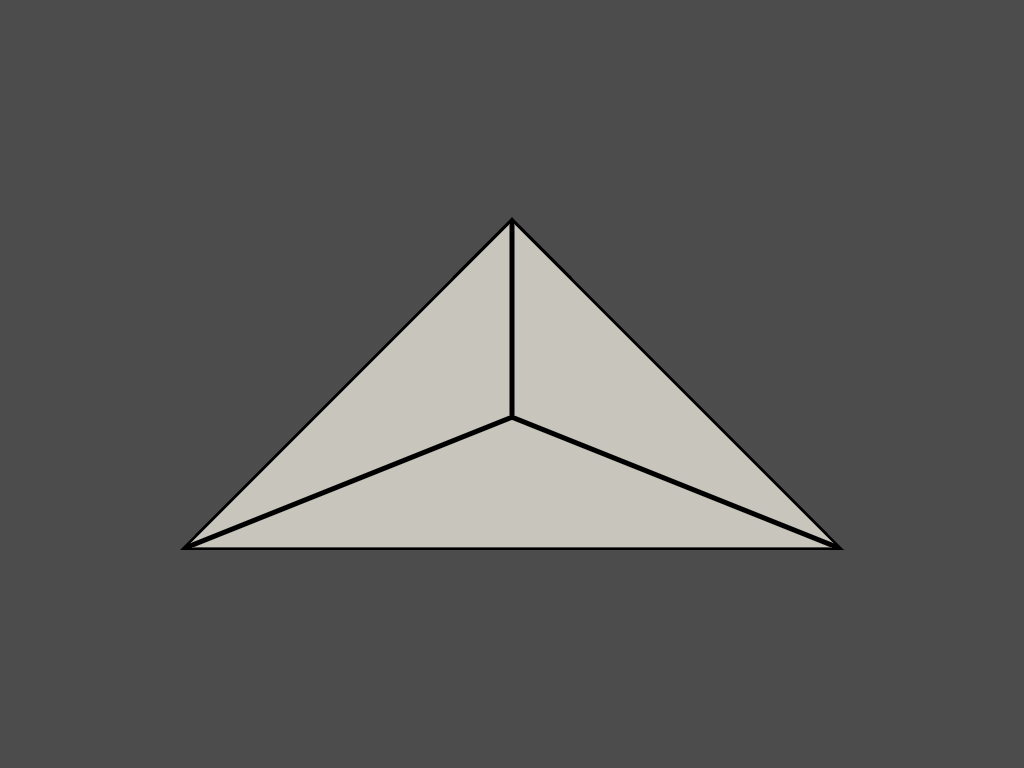

[0.42426406871192845, 0.5385164807134505]

In [8]:
points = np.array([[0,0,0],
                   [2,0,0],
                   [1,1,0],
                   [1, 0.4, 0]])
# [number of points, first point, second point, third point]
cells = [[3,0,3,2], [3,0,1,3], [3, 3,1,2]] #it is important that each cell is between []
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(4)],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

p = []
i = 0
aspect_ratio = []
distance = []

for y in range(0,2):
    for x in range(1,5):
        if i < 3:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == 3:
            for x in range(0,3):
                l = abs(p[x%3]-p[(x+1)%3]) # calculates the difference in x and y coordinates of the points
                d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                distance.append(d)
            ar = min(distance)/max(distance)
            aspect_ratio.append(ar)
            i = 0
            p =[]
            distance = []
            
            
aspect_ratio

It only shows the Aspect Ratio of two cells, so that does not work! We should still find a option to automate the range. 

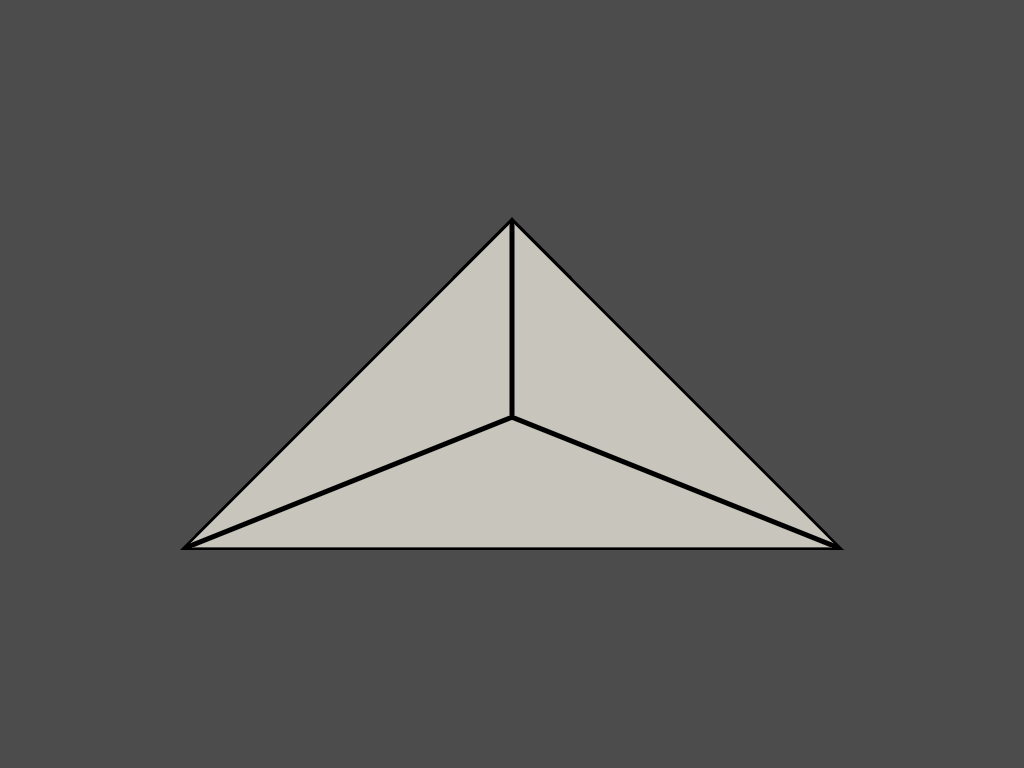

[0.42426406871192845, 0.5385164807134505, 0.42426406871192845]

In [9]:
points = np.array([[0,0,0],
                   [2,0,0],
                   [1,1,0],
                   [1, 0.4, 0]])
# [number of points, first point, second point, third point]
cells = [[3,0,3,2], [3,0,1,3], [3, 3,1,2]] #it is important that each cell is between []
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(4)],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

q = len(cells)
p = []
i = 0
aspect_ratio = []
distance = []

for y in range(0,q):
    for x in range(1,5):
        if i < 3:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == 3:
            for x in range(0,3):
                l = abs(p[x%3]-p[(x+1)%3]) # calculates the difference in x and y coordinates of the points
                d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                distance.append(d)
            ar = min(distance)/max(distance)
            aspect_ratio.append(ar)
            i = 0
            p =[]
            distance = []
            
aspect_ratio

Now again lets check whether is also works on other meshes.

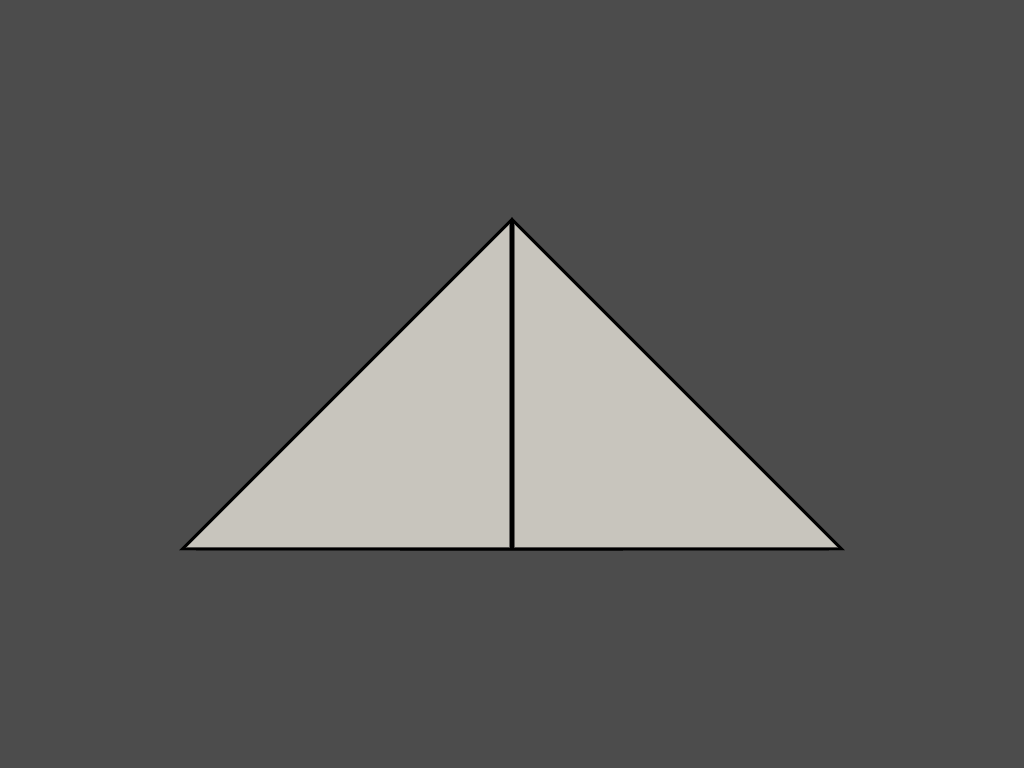

[0.7071067811865475, 0.7071067811865475]

In [10]:
points = np.array([[0,0,0],
                   [2,0,0],
                   [1,1,0],
                   [1,0,0]])
# [number of points, first point, second point, third point]
cells = [[3, 0,3,2], 
          [3, 3,1,2]]
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(4)],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

q = len(cells)
p = []
i = 0
aspect_ratio = []
distance = []

for y in range(0,q):
    for x in range(1,5):
        if i < 3:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == 3:
            for x in range(0,3):
                l = abs(p[x%3]-p[(x+1)%3]) # calculates the difference in x and y coordinates of the points
                d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                distance.append(d)
            ar = min(distance)/max(distance)
            aspect_ratio.append(ar)
            i = 0
            p =[]
            distance = []
            
aspect_ratio

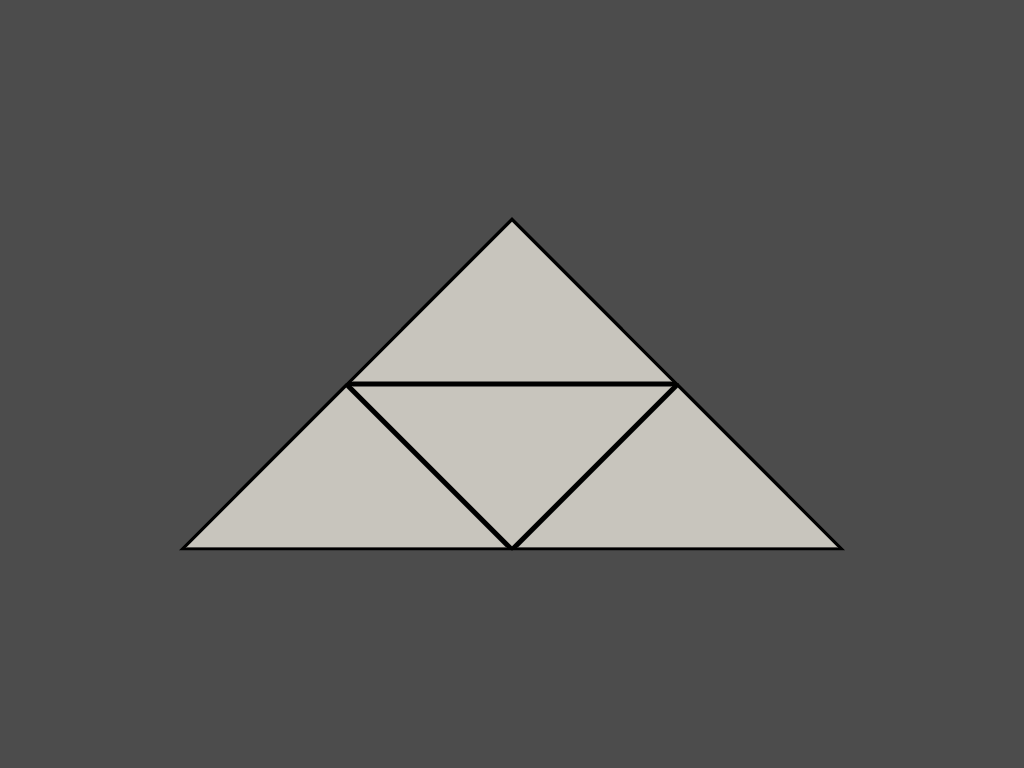

[0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476]

In [11]:
points = np.array([[0,0,0],
                   [2,0,0],
                   [1,1,0],
                   [1,0,0],
                   [0.5,0.5,0],
                   [1.5,0.5,0]])
# [number of points, first point, second point, third point]
cells = [[3, 0,3,4], 
          [3, 3,1,5], 
          [3, 3,5,4],
          [3, 4,5,2]]
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(6)],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

q = len(cells)
p = []
i = 0
aspect_ratio = []
distance = []

for y in range(0,q):
    for x in range(1,5):
        if i < 3:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == 3:
            for x in range(0,3):
                l = abs(p[x%3]-p[(x+1)%3]) # calculates the difference in x and y coordinates of the points
                d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                distance.append(d)
            ar = min(distance)/max(distance)
            aspect_ratio.append(ar)
            i = 0
            p =[]
            distance = []
            
aspect_ratio

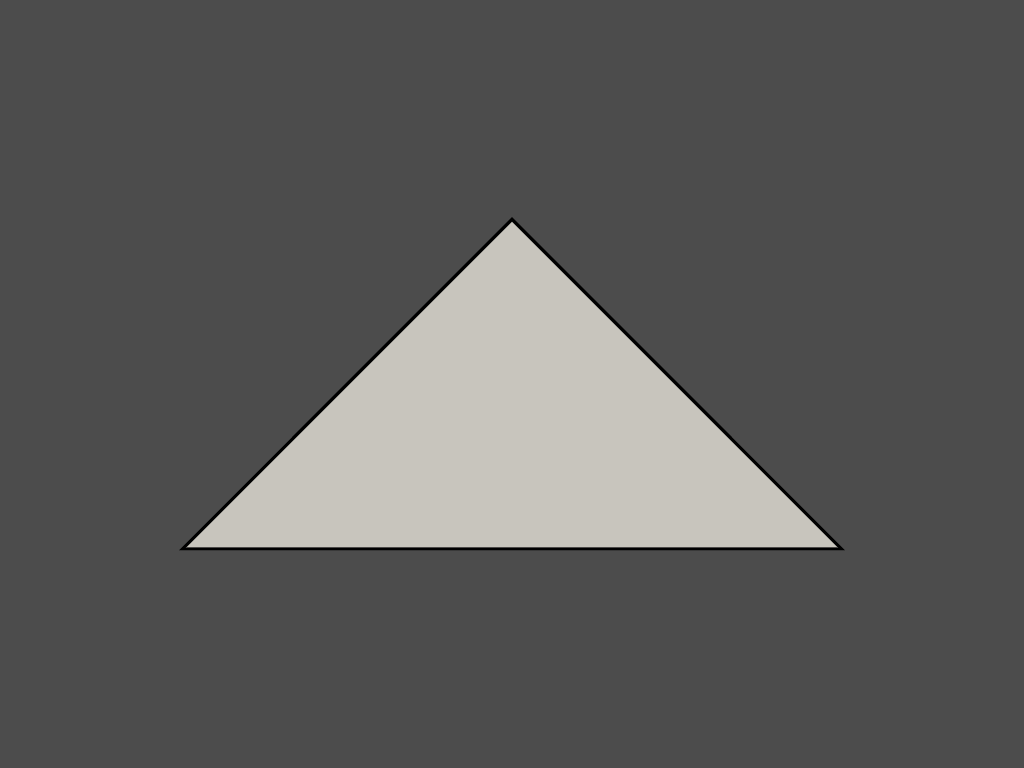

[0.7071067811865476]

In [12]:
import numpy as np
import pyvista
points = np.array([[0,0,0],
                   [2,0,0],
                   [1,1,0]])
cells = [[3, 0, 1, 2]]
mesh = pyvista.PolyData(points, [3, 0, 1, 2])
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(3)],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

q = len(cells)
p = []
i = 0
aspect_ratio = []
distance = []

for y in range(0,q):
    for x in range(1,5):
        if i < 3:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == 3:
            for x in range(0,3):
                l = abs(p[x%3]-p[(x+1)%3]) # calculates the difference in x and y coordinates of the points
                d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                distance.append(d)
            ar = min(distance)/max(distance)
            aspect_ratio.append(ar)
            i = 0
            p =[]
            distance = []
            
aspect_ratio

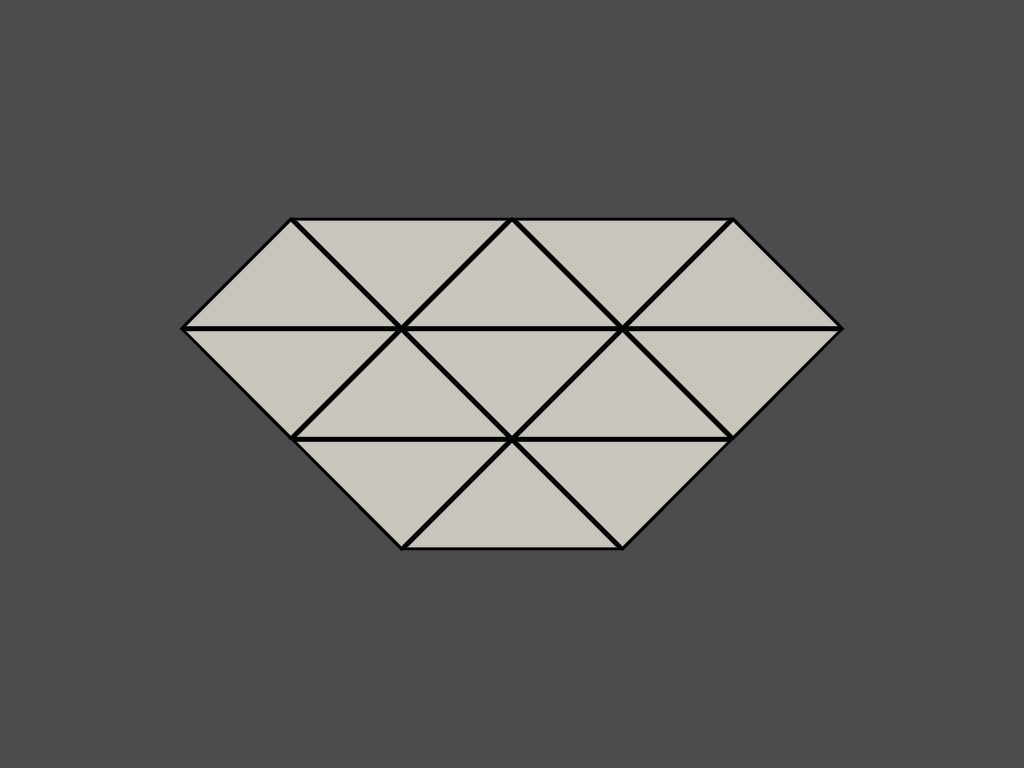

[0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865476]

In [13]:
import numpy as np
import pyvista
points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [4,0,0],
                  [3,1,0],
                  [1,-1,0],
                  [3,-1,0],
                  [6,0,0],
                  [5,1,0],
                  [5,-1,0],
                  [2,-2,0],
                  [4,-2,0]])
cells = [[3, 0,1,2], 
         [3, 1,3,4],
         [3, 1,4,2],
         [3, 0,5,1],
         [3, 5,6,1],
         [3, 6,3,1],
         [3, 3,8,4],
         [3, 3,7,8],
         [3, 6,3,9],
         [3, 9,7,3],
         [3, 5,10,6],
         [3, 10,11,6],
         [3, 11,9,6]]
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(12)],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

#--Aspect Ratio Code----------------------------------------------------------------------------------------------------------#
q = len(cells)
p = []
i = 0
aspect_ratio = []
distance = []

for y in range(0,q):
    for x in range(1,5):
        if i < 3:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == 3:
            for x in range(0,3):
                l = abs(p[x%3]-p[(x+1)%3]) # calculates the difference in x and y coordinates of the points
                d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                distance.append(d)
            ar = min(distance)/max(distance)
            aspect_ratio.append(ar)
            i = 0
            p =[]
            distance = []
            
aspect_ratio

As can be concluded for this does the code work :)

# Skewness Automatic
The Skewness is defined as the absolute ratio of the optimal angle and the real angle. 

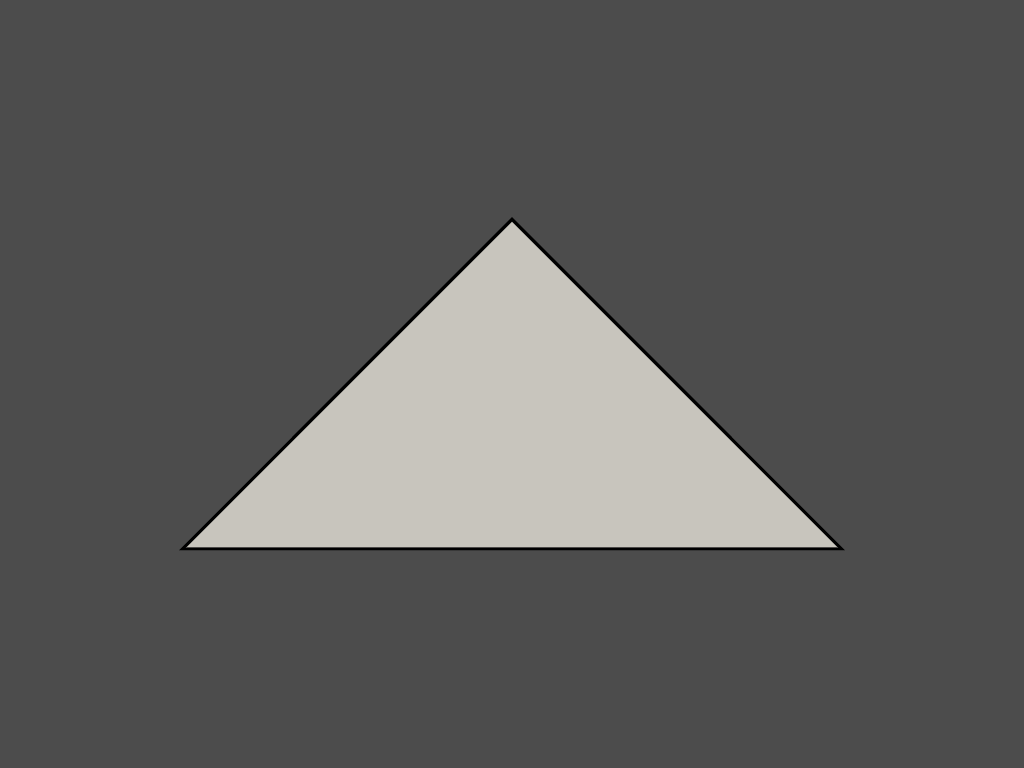

The Skewness of the cell is  0.25


In [14]:
import numpy as np
import pyvista
points = np.array([[0,0,0],
                   [2,0,0],
                   [1,1,0]])
cells = [[3, 0, 1, 2]]
mesh = pyvista.PolyData(points, [3, 0, 1, 2])
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(3)],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

import math

length = abs(points[0]-points[1])
lengthx = length[0]
lengthy = length[1]
distance1= math.sqrt(lengthx**2 + lengthy**2)

length = abs(points[1]-points[2])
lengthx = length[0]
lengthy = length[1]
distance2= math.sqrt(lengthx**2 + lengthy**2)

length = abs(points[2]-points[0])
lengthx = length[0]
lengthy = length[1]
distance3= math.sqrt(lengthx**2 + lengthy**2)
a = distance2
b = distance3
c = distance1

alpha = math.degrees(math.acos((a**2-b**2-c**2)/(-2*b*c)))
beta = math.degrees(math.acos((b**2-c**2-a**2)/(-2*c*a)))
gamma = math.degrees(math.acos((c**2-b**2-a**2)/(-2*b*a)))

qmin = min(alpha, beta, gamma)
qmax = max(alpha, beta, gamma)
qe=60
Skewness = max((qmax-qe)/(180-qe), (qe-qmin)/qe) 

print("The Skewness of the cell is ", round(Skewness,2))

In [15]:
q = len(cells)
p = []
i = 0
Skewness = []
distance = []

for y in range(0,q):
    for x in range(1,5):
        if i < 3:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == 3:
            for x in range(0,3):
                l = abs(p[x%3]-p[(x+1)%3]) # calculates the difference in x and y coordinates of the points
                d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                distance.append(d)
            a = distance[1]
            b = distance[2]
            c = distance[0]
            alpha = math.degrees(math.acos((a**2-b**2-c**2)/(-2*b*c)))
            beta = math.degrees(math.acos((b**2-c**2-a**2)/(-2*c*a)))
            gamma = math.degrees(math.acos((c**2-b**2-a**2)/(-2*b*a)))
            qmin = min(alpha, beta, gamma)
            qmax = max(alpha, beta, gamma)
            qe=60
            skewness = max((qmax-qe)/(180-qe), (qe-qmin)/qe) 
            Skewness.append(skewness)

            i = 0
            p =[]
            distance = []
            
Skewness

[0.2499999999999999]

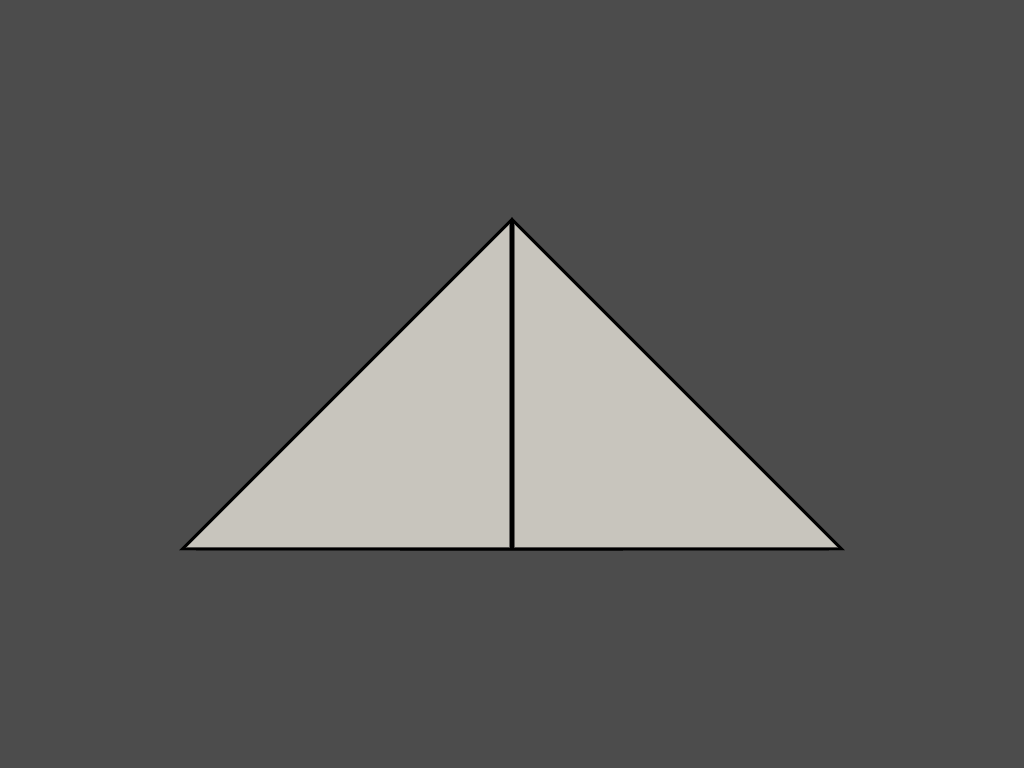

[0.2500000000000002, 0.2500000000000002]

In [16]:
points = np.array([[0,0,0],
                   [2,0,0],
                   [1,1,0],
                   [1,0,0]])
# [number of points, first point, second point, third point]
cells = [[3, 0,3,2], 
          [3, 3,1,2]]
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(4)],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

q = len(cells)
p = []
i = 0
Skewness = []
distance = []

for y in range(0,q):
    for x in range(1,5):
        if i < 3:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == 3:
            for x in range(0,3):
                l = abs(p[x%3]-p[(x+1)%3]) # calculates the difference in x and y coordinates of the points
                d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                distance.append(d)
            a = distance[1]
            b = distance[2]
            c = distance[0]
            alpha = math.degrees(math.acos((a**2-b**2-c**2)/(-2*b*c)))
            beta = math.degrees(math.acos((b**2-c**2-a**2)/(-2*c*a)))
            gamma = math.degrees(math.acos((c**2-b**2-a**2)/(-2*b*a)))
            qmin = min(alpha, beta, gamma)
            qmax = max(alpha, beta, gamma)
            qe=60
            skewness = max((qmax-qe)/(180-qe), (qe-qmin)/qe) 
            Skewness.append(skewness)
            i = 0
            p =[]
            distance = []
            
Skewness

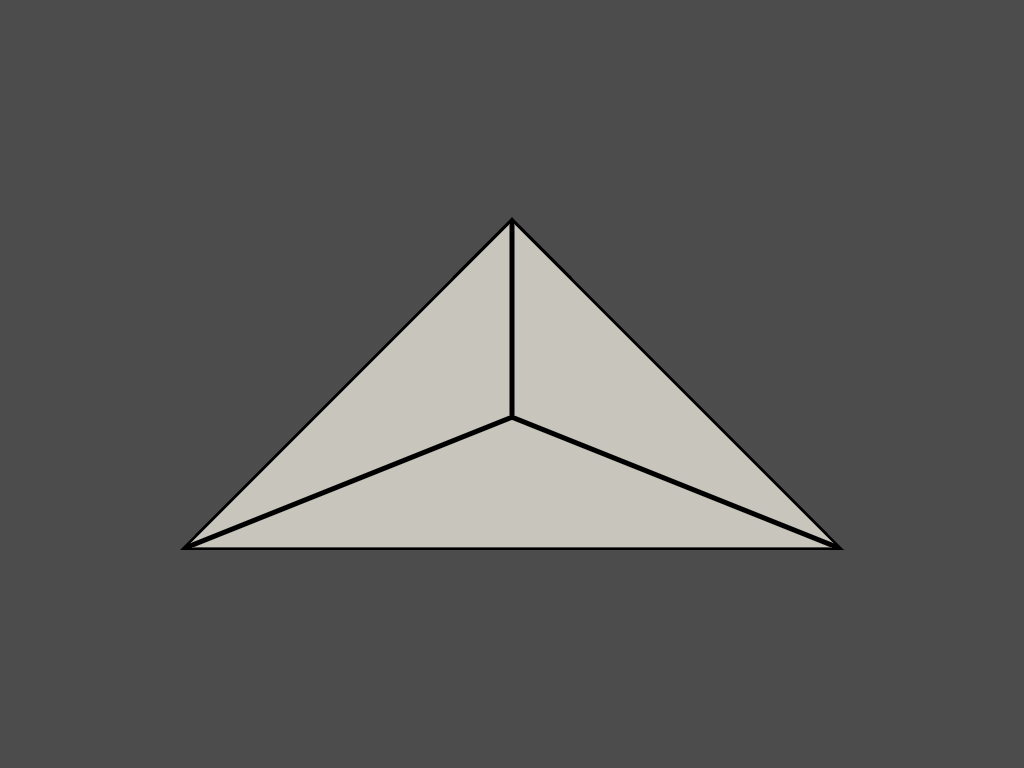

[0.6133568247725303, 0.6366431752274695, 0.6133568247725303]

In [17]:
points = np.array([[0,0,0],
                   [2,0,0],
                   [1,1,0],
                   [1, 0.4, 0]])
# [number of points, first point, second point, third point]
cells = [[3,0,3,2], [3,0,1,3], [3, 3,1,2]] #it is important that each cell is between []
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(4)],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

q = len(cells)
p = []
i = 0
Skewness = []
distance = []

for y in range(0,q):
    for x in range(1,5):
        if i < 3:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == 3:
            for x in range(0,3):
                l = abs(p[x%3]-p[(x+1)%3]) # calculates the difference in x and y coordinates of the points
                d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                distance.append(d)
            a = distance[1]
            b = distance[2]
            c = distance[0]
            alpha = math.degrees(math.acos((a**2-b**2-c**2)/(-2*b*c)))
            beta = math.degrees(math.acos((b**2-c**2-a**2)/(-2*c*a)))
            gamma = math.degrees(math.acos((c**2-b**2-a**2)/(-2*b*a)))
            qmin = min(alpha, beta, gamma)
            qmax = max(alpha, beta, gamma)
            qe=60
            skewness = max((qmax-qe)/(180-qe), (qe-qmin)/qe) 
            Skewness.append(skewness)
            i = 0
            p =[]
            distance = []
            
Skewness

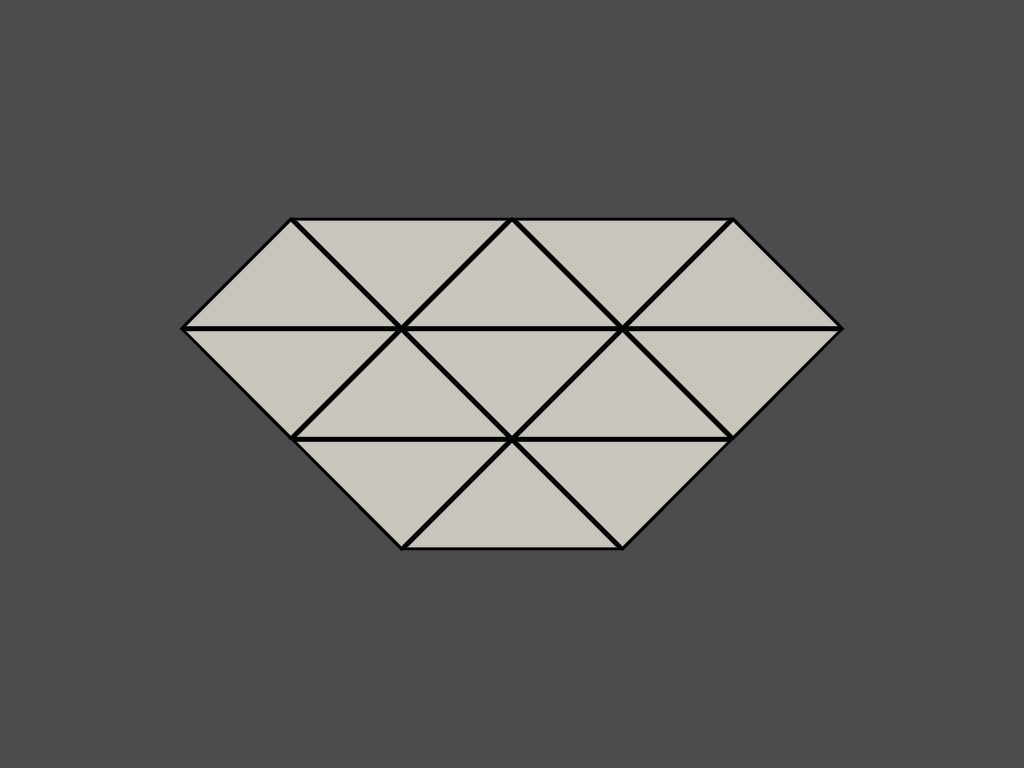

[0.2499999999999999,
 0.2499999999999999,
 0.2499999999999999,
 0.2499999999999999,
 0.2499999999999999,
 0.2499999999999999,
 0.2499999999999999,
 0.2499999999999999,
 0.2499999999999999,
 0.2499999999999999,
 0.2499999999999999,
 0.2499999999999999,
 0.2499999999999999]

In [18]:
import numpy as np
import pyvista
points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [4,0,0],
                  [3,1,0],
                  [1,-1,0],
                  [3,-1,0],
                  [6,0,0],
                  [5,1,0],
                  [5,-1,0],
                  [2,-2,0],
                  [4,-2,0]])
cells = [[3, 0,1,2], 
         [3, 1,3,4],
         [3, 1,4,2],
         [3, 0,5,1],
         [3, 5,6,1],
         [3, 6,3,1],
         [3, 3,8,4],
         [3, 3,7,8],
         [3, 6,3,9],
         [3, 9,7,3],
         [3, 5,10,6],
         [3, 10,11,6],
         [3, 11,9,6]]
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(12)],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

#--Skewness Code----------------------------------------------------------------------------------------------------------#

q = len(cells)
p = []
i = 0
Skewness = []
distance = []

for y in range(0,q):
    for x in range(1,5):
        if i < 3:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == 3:
            for x in range(0,3):
                l = abs(p[x%3]-p[(x+1)%3]) # calculates the difference in x and y coordinates of the points
                d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                distance.append(d)
            a = distance[1]
            b = distance[2]
            c = distance[0]
            alpha = math.degrees(math.acos((a**2-b**2-c**2)/(-2*b*c)))
            beta = math.degrees(math.acos((b**2-c**2-a**2)/(-2*c*a)))
            gamma = math.degrees(math.acos((c**2-b**2-a**2)/(-2*b*a)))
            qmin = min(alpha, beta, gamma)
            qmax = max(alpha, beta, gamma)
            qe=60
            skewness = max((qmax-qe)/(180-qe), (qe-qmin)/qe) 
            Skewness.append(skewness)
            i = 0
            p =[]
            distance = []
            
Skewness

As can be conlcuded from this, does the code for the Skewness work :).

# Ortogonality

First adding the middle points of each of the cells.

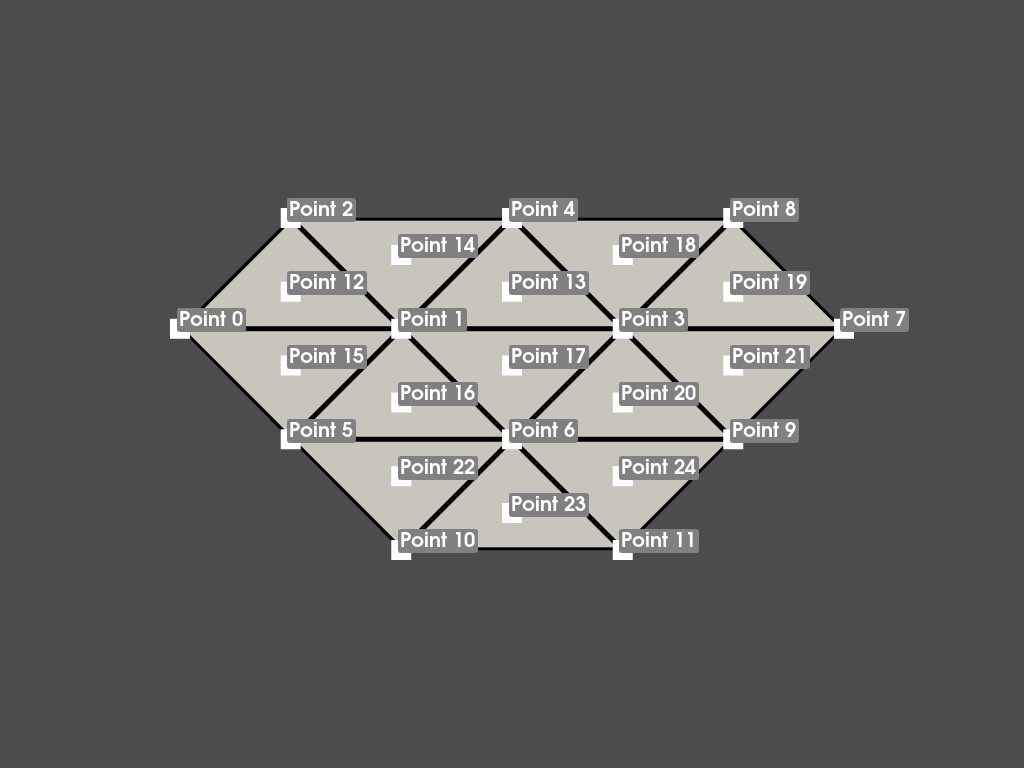

In [19]:
if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    
elif cells[0][0] == 4: #If the mesh is square
    z1 = 4
    z2 = 6

q = len(cells) #the total number of cells in the mesh
p = [] 
i = 0
center = []

for y in range(0,q):
    for x in range(1,5):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            if z1==3:
                c = (p[0]+p[1]+p[2])/3
                center.append(c)
            elif z1==4:
                c = (p[0]+p[1]+p[2]+p[3])/4
                center.append(c)
            i=0
            p = []   


points = np.vstack([points, center])

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
label_coords = mesh.points + [0, 0, 0.01]
pl.add_point_labels(label_coords, [f'Point {i}' for i in range(len(points))],
                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

New lets try to calculate the angle between the normal and the middle point of the neighbouring cell.

In [22]:
i = len(cells) #the total number of cells in the mesh
g = len(points)
Orthogonality = []

for z in range (0,i):    
    d = cells[z][1]
    e = cells[z][2]
    f = cells[z][3]
    y = [] #numbers neighbouring cell

    for x in range(0,i):
        if d in cells[x][1:] and e in cells[x][1:]:
            if x != z:
                y.append(x)
        
    for x in range(0,i):
        if e in cells[x][1:] and f in cells[x][1:]:
            if x != z:
                y.append(x)

    for x in range(0,i):
        if d in cells[x][1:] and f in cells[x][1:]:
            if x != z:
                y.append(x)

    if len(y)==1:
        o = points[g-i+z]
        a = points[g-i+y[0]]
        ax = abs(a[0]-o[0])
        ay = abs(a[1]-o[1])
        if ax == 0 or ay == 0:
            orthogonality = 0
        else: 
            alpha = math.atan(ay/ax)
            orthogonality = abs((90-alpha)/(90))
        Orthogonality.append(orthogonality)                                       
    elif len(y)==2:
        o = points[g-i+z]
        a = points[g-i+y[0]] 
        ax = abs(a[0]-o[0])
        ay = abs(a[1]-o[1])
        if ax == 0 or ay == 0:
            orthogonality_a = 0
        else: 
            alpha = math.atan(ay/ax)
            orthogonality_a = abs((90-alpha)/(90))
        b = points[g-i+y[1]]
        bx = abs(b[0]-o[0])
        by = abs(b[1]-o[1])
        if bx == 0 or by == 0:
            orthogonality_b = 0
        else: 
            beta = math.atan(by/bx)
            orthogonality_b = abs((90-beta)/(90))
        orthogonality = abs((90-(orthogonality_a+orthogonality_b)/2)/90)
        Orthogonality.append(orthogonality)                                  
    elif len(y) ==3:
        o = points[g-i+z]
        a = points[g-i+y[0]]
        ax = abs(a[0]-o[0])
        ay = abs(a[1]-o[1])
        if ax == 0 or ay == 0:
            orthogonality_a = 0
        else: 
            alpha = math.atan(ay/ax)
            orthogonality_a = abs((90-alpha)/(90))
        b = points[g-i+y[1]]
        bx = abs(b[0]-o[0])
        by = abs(b[1]-o[1])
        if bx == 0 or by == 0:
            orthogonality_b = 0
        else: 
            beta = math.atan(by/bx)
            orthogonality_b = abs((90-beta)/(90))
        c = points[g-i+y[2]]
        cx = abs(c[0]-o[0])
        cy = abs(c[1]-o[1])
        if cx == 0 or cy == 0:
            orthogonality_c = 0
        else: 
            gamma = math.atan(cy/cx)
            orthogonality_c = abs((90-gamma)/(90))
        orthogonality = abs((90-(orthogonality_a+orthogonality_b+orthogonality_c)/3)/90)
        Orthogonality.append(orthogonality)

print(Orthogonality)

[0.9944643055897776, 0.9926190741197034, 0.9889286111795551, 0.9944643055897776, 0.9926190741197034, 0.9926190741197034, 0.9889286111795551, 0.9944643055897776, 0.9926190741197034, 0.9944643055897776, 0.9944643055897776, 0.9889286111795551, 0.9944643055897776]
